# 'Johnson County' Property Exploratory Data Analysis

## Introduction


Our main source of data comes from Redfin, https://www.redfin.com/, which is a website similar to Zillow that allows you to 'Find the right home at the right price' [1]. In addition to looking at available properties, there is an additional option that shows the properties that have been sold. A certain reason why this Redfin was utilized as opposed to Zillow, a similar website, was that Redfin allowed your search queries to be downloaded as a CSV file. The only issue with this was that depending on what was searched, a maximum of 350 housing records would be available to download. As a result, for the 2,000 records listed on Redfin for a Johnson County search result for houses sold in the past 3 months (October 10 was the day the search took place), only 350 would be available to download. 

However, we could sort of trick the system by searching by certain zipcodes in Johnson County. As long as there are not more than 350 housing records for that zipcode, we should be able to download all the records for that zipcode.

To find a list of zipcodes in Johnson County, we utilizied a list from Zillow https://www.zillow.com/browse/homes/ks/johnson-county/, where all the zipcodes from the first column were used to search for housing records on Redfin. Since I did not utilize both columns of zipcodes, our dataset won't be representative of all properties sold in Johnson County within the past 3 months (hence why Johnson County is in quotes).

Although time-consuming, all the queries per zipcode were run and downloaded. Once all the CSV files were downloaded, they were placed into a folder. With the help of Power Query in Excel, all the files in this folder were then able to be combined. Once combined, columns not necessary were deleted, and the newer large dataset was exported as a CSV file.

## Loading in and changing column names, and filtering through the 'Property Type' column.

In [445]:
# Importing pandas library
import pandas as pd

# Reading in our datafile as a dataframe
df = pd.read_csv('jcre.csv', encoding='latin1')  
'''
Usually, specifying the encoding parameter is not necessary, but for some reason, the csv file would not be read in in. 
Luckily, we were able to find it was loaded properly in using the 'latin1' setting for the encoding hyperparamter.
'''

# Viewing the number of rows and columns in our dataframe along with the first 5 rows.
print(df.shape)
df.head()

(1809, 15)


,SALE TYPE,SOLD DATE,PROPERTY TYPE,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH
0,"In accordance with local MLS rules, some MLS l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PAST SALE,7/16/2024,Single Family Residential,Prairie Village,KS,66207.0,695000.0,4.0,2.5,Kenilworth,3356.0,16223.0,1963.0,207.0,7.0
2,PAST SALE,9/26/2024,Single Family Residential,Shawnee,KS,66226.0,469900.0,3.0,3.0,Villas of Greenview Ridge,2540.0,8777.0,2004.0,185.0,46.0
3,PAST SALE,10/1/2024,Single Family Residential,Lenexa,KS,66219.0,600000.0,4.0,3.0,Cross Point Creek Cottages,3185.0,3733.0,2008.0,188.0,NaN
4,PAST SALE,8/28/2024,Condo/Co-op,Leawood,KS,66209.0,950000.0,2.0,2.5,Parkway 133,2829.0,NaN,2007.0,336.0,1084.0


In [446]:
# Changing all the columns to only have the first digit capitalized and the rest being lower case. 
df.columns = [c.capitalize() for c in df.columns ]

# Filtering through dataframe to only include rows with 'Single Family Residental' in the 'Property type' column.
df = df[df['Property type'] == 'Single Family Residential'] 

# Viewing the first five row sof our dataframe.
df.head()

,Sale type,Sold date,Property type,City,State or province,Zip or postal code,Price,Beds,Baths,Location,Square feet,Lot size,Year built,$/square feet,Hoa/month
1,PAST SALE,7/16/2024,Single Family Residential,Prairie Village,KS,66207.0,695000.0,4.0,2.5,Kenilworth,3356.0,16223.0,1963.0,207.0,7.0
2,PAST SALE,9/26/2024,Single Family Residential,Shawnee,KS,66226.0,469900.0,3.0,3.0,Villas of Greenview Ridge,2540.0,8777.0,2004.0,185.0,46.0
3,PAST SALE,10/1/2024,Single Family Residential,Lenexa,KS,66219.0,600000.0,4.0,3.0,Cross Point Creek Cottages,3185.0,3733.0,2008.0,188.0,NaN
5,PAST SALE,8/22/2024,Single Family Residential,Prairie Village,KS,66207.0,4275417.0,5.0,6.5,Meadowbrook Park,6680.0,13877.0,2024.0,640.0,816.0
6,PAST SALE,8/30/2024,Single Family Residential,Fairway,KS,66205.0,400000.0,3.0,2.5,Mission Highlands,1188.0,8399.0,1948.0,337.0,NaN


## Data overview, columns, and structure

In [447]:
# Viewing the number of columns and rows in the dataframe
print('Number of rows and columns in our current dataframe: ', df.shape)

# Printing a blank line in between the two print statements.
print() 

# Viewing information such as column data types, number of non missing values, and memory used.
print(df.info())

Number of rows and columns in our current dataframe:  (1603, 15)

<class 'pandas.core.frame.DataFrame'>
Index: 1603 entries, 1 to 1808
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sale type           1603 non-null   object 
 1   Sold date           1599 non-null   object 
 2   Property type       1603 non-null   object 
 3   City                1603 non-null   object 
 4   State or province   1603 non-null   object 
 5   Zip or postal code  1603 non-null   float64
 6   Price               1602 non-null   float64
 7   Beds                1603 non-null   float64
 8   Baths               1603 non-null   float64
 9   Location            1565 non-null   object 
 10  Square feet         1599 non-null   float64
 11  Lot size            1595 non-null   float64
 12  Year built          1532 non-null   float64
 13  $/square feet       1598 non-null   float64
 14  Hoa/month           915 non-null    float64

Fromabove, our current data frame has 1797 rows/observations and 15 columns/features.

We can also see how each of our columns/features are treated in our dataframe. For example, nine columns are treated are numerical (float) while six are treated as categorical (string).

Based on the above and some common knowledge, we can learn more about our current variables.
* **Sale type** -> This column is most likely in reference to different search results on Redfin, either viewing renting options, sold, and current properties available.
* **Sold date** -> This column represents the date that the property was sold.
* **Property type** -> This represents what type of property is being sold.
* **City** -> This columns represents the city the property was sold in.
* **State or province** -> This columns represents the state the property was sold in.
* **Zip or postal code** -> This column houses the zipcodes where each of the properties sold resides. Although treated as numerical, this is technically a categorical variable.
* **Price** -> Our target variable, the number of dollars a property was sold for.
* **Beds** -> This column represents the number of bedrooms in the property.
* **Bath** -> This column represents the number of bathrooms in the property.
* **Location** -> This column seems to represent the neighborhood the property resides in.
* **Square feet** -> This column represents the number of square feet in the residence.
* **Lot size** -> This column represents the number of square feet of land the property resides on.
* **Year built** -> This columns represents the year the property was built.
* **$/square feet** -> Based on the price the property was sold, the price per square foot. 
* **Hoa/month** -> This column represents the hoa fee per month.

We can already disqualify the 'Price' variable as a predictor variable since it is the variable we are trying to predict. Additionally, I believe the '$/square feet' column is actually calculated as 'Price' / 'Square feet', which means this variable could be a good predictor for the selling price. Moreover, since the 'Sale type' column is the same for all of our rows (as all of these properties have been sold), it won't provide any insight into predicting the selling price. Similarly, the 'State or Province' column contains the same value for all entries, making it equally unhelpful. Given that the dataset was previously filtered to include only Single Family Residential properties that were sold, this column will also not be useful.

In [448]:
# Deleting unnecessary columns from our dataframe.
del df['State or province']
del df['$/square feet']
del df['Sale type']
del df['Property type']
del df['Sold date']

# Viewing the information for the dataframe without the 5 above columns
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1603 entries, 1 to 1808
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                1603 non-null   object 
 1   Zip or postal code  1603 non-null   float64
 2   Price               1602 non-null   float64
 3   Beds                1603 non-null   float64
 4   Baths               1603 non-null   float64
 5   Location            1565 non-null   object 
 6   Square feet         1599 non-null   float64
 7   Lot size            1595 non-null   float64
 8   Year built          1532 non-null   float64
 9   Hoa/month           915 non-null    float64
dtypes: float64(8), object(2)
memory usage: 137.8+ KB


After deleting those four columns, we now have four variables treated as categorical, while the remaining are numerical. Common sense dictates that the categorical variables are 'City,' 'Zip or postal code,' and 'Location.' 

However, isn't our model currently treating 'Zip or postal code' as a numerical variable? Although it is, this doesn’t imply it’s handled properly. For instance, since 'Zip or postal code' values consist of five numerical digits, the model will assume that higher values represent something greater than lower values. Even though each 'Zip or postal code' is unique, a machine learning model might misinterpret the numerical differences, leading to erroneous conclusions. To circumvent this, we need to create new dummy columns for each unique 'Zip or postal code' (this process will be detailed later). Indeed, the same approach must be applied to the 'City' and 'Location' variables if they are chosen to predict the selling price. All remaining variables, aside from the three mentioned, are correctly interpreted as numerical.

## Handling Missing values

In [449]:
# Viewing how many missing values there are in our dataframe.
df.isnull().sum()

City                    0
Zip or postal code      0
Price                   1
Beds                    0
Baths                   0
Location               38
Square feet             4
Lot size                8
Year built             71
Hoa/month             688
dtype: int64

As observed, four columns have no missing values. 
The primary consideration is how to handle the missing values in our data frame

With only 1 missing value in the 'Price' column, it is practical to instead remove that observation/row from our data frame. Additionally, given that only four missing values occur in the 'Square feet' column, removing these rows may be benefical.

In [450]:
# Copying our inital dataframe to a new dataframe.
df_na_set_trial_1 = df.copy()

# Finding out the length of the copied dataframe.
og_length = df_na_set_trial_1.shape[0]

# Dropping the rows with missing values in the 'Price' and/or 'Square feet' columns.
df_na_set_trial_1 = df_na_set_trial_1.dropna(subset=['Price','Square feet'])

# Finding out the length of the copied dataframe with fewer missing values.
new_length = df_na_set_trial_1.shape[0]

# Finding out how much data was lost by removing rows entirely.
print(new_length/og_length * 100)

99.68808484092327


As we can see from the above output, when we remove the rows that have missing values in the 'Price' and 'Sold date' columns, we still have 99.68% of the original dataset. If the above number were closer to 90%, we would lose 10% of the original dataframe. Since that 10% of the data could hold valuable information, it may be better to use other methods, namely imputation. 

The simple process of imputation involves filling in missing values with a certain value such as the average (mean), median, or mode for numerical data, and the most frequent category for categorical data. The main issue with this method is that the new value could be unrepresentative of that property when compared with other columns in the dataframe. Consequently, other methods could be used that take this into account, but since the main point of this project isn't focused on dealing with missing values, we won’t explore these methods further.

In [451]:
# Dropping all the rows with missing values in either the 'Price' or 'Square feet' columns.
df = df.dropna(subset=['Price','Square feet'])

# Viewing how many missing values per column in our dataframe.
df.isnull().sum

Referencing the descriptions of each of our variables, we can further consider why there might be missing data. For instance, regarding the 'Hoa/month' column, it's possible that there could be no zero value, resulting in a missing entry rather than a reported zero.

In [453]:
# Importing numpy library.
import numpy as np

# Viewing the minimum value in 'Hoa/month' utilizing the min function from numpy.
print('Minimum value for Hoa/month', np.min(df['Hoa/month']))

Minimum value for Hoa/month 1.0


As observed, the minimum value is listed as 1. I infer from this that some properties don't have HOA fees, but these fees were not reported. Additionally, there may be properties with no lot size listed when sold, which could also be represented as missing data rather than zero.

In [454]:
# Filling in all the missing values in the 'Hoa/month' variable with 0.
df['Hoa/month'].fillna(0, inplace=True)

# Viewing how many missing values are in our dataframe.
df.isnull().sum()

City                   0
Zip or postal code     0
Price                  0
Beds                   0
Baths                  0
Location              38
Square feet            0
Lot size               8
Year built            71
Hoa/month              0
dtype: int64

With the three columns that still have missing values, we need to address them through imputation. We will use two different types of imputation:

1. Median Imputation
2. Most Frequent Category Imputation

Median imputation will be used for 'Lot size' and 'Year built' since they are both numerical variables. If there is skewness in these variables, the median will serve as a more accurate measure of central tendency.

Most frequent category imputation will be used for 'Location' because it is a categorical variable.

In [455]:
# Importing SimpleImputer fnction from sklearn
from sklearn.impute import SimpleImputer

# Creating simple imputer for categorical features and numerical features.
cat_imput = SimpleImputer(strategy='most_frequent')
num_imput = SimpleImputer(strategy='median')

In [456]:
# Fitting and tranforming the categorical imputer on the categorical variable.
df['Location'] = cat_imput.fit_transform(df[['Location']]).ravel()

# Fitting and transforming the numerical imputer on the numerical variables.
df[['Lot size','Year built']] = num_imput.fit_transform(df[['Lot size','Year built']])

# Viewing how many missing values there are per column in our dataframe.
df.isnull().sum()

City                  0
Zip or postal code    0
Price                 0
Beds                  0
Baths                 0
Location              0
Square feet           0
Lot size              0
Year built            0
Hoa/month             0
dtype: int64

## Target Variable Analysis

count    1.598000e+03
mean     5.414798e+05
std      3.358772e+05
min      1.400000e+05
25%      3.500000e+05
50%      4.500000e+05
75%      6.199875e+05
max      4.750000e+06
Name: Price, dtype: float64


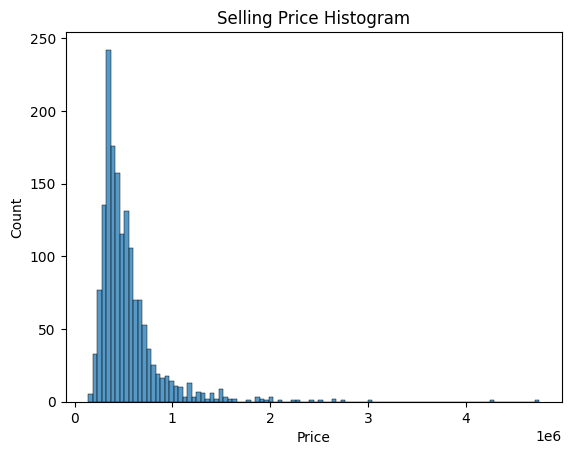

In [457]:
# Importing data visualization libraries/function (seaborn and matplotlib.pyplot).
import seaborn as sns
import matplotlib.pyplot as plt

# Viewing the summary stats for the 'Price' variable.
print(df['Price'].describe())

# Creating histogram for the 'Price' variable.
sns.histplot(df['Price'])
plt.title('Selling Price Histogram')
plt.show()

The two pieces of output provide valuable insights. Firstly, the median selling price is $450,000, with a standard deviation of around $336,000, indicating a notable level of variability. 

Secondly, the histogram reveals that most selling prices are below $1,000,000. Additionally, since a greater number of selling prices occur on the left side of the graph, this suggests that our target variable is positively skewed. Transforming it could potentially lead to better results in the future.

## Predictor Variable Analysis

In [458]:
# Specifying two lists with names of numerical variables and categorical variables.
num_feat = ['Beds','Baths','Square feet','Lot size','Hoa/month','Year built']
cat_feat = ['City','Zip or postal code','Location']

### Numerical Predictor Variables

In [459]:
# Viewing the summary stats for each numerical predictor variable.
df[num_feat].describe()

,Beds,Baths,Square feet,Lot size,Hoa/month,Year built
count,1598.000000,1598.000000,1598.000000,1.598000e+03,1598.000000,1598.000000
mean,3.742804,3.009387,2661.032541,1.608741e+04,48.721527,1986.764080
std,0.837181,1.077132,1158.733116,6.564215e+04,88.896840,24.791025
min,1.000000,1.000000,576.000000,1.000000e+00,0.000000,1860.000000
25%,3.000000,2.500000,1779.250000,8.776250e+03,0.000000,1967.000000
50%,4.000000,3.000000,2508.000000,1.069150e+04,17.000000,1990.000000
75%,4.000000,3.500000,3279.750000,1.350300e+04,58.000000,2003.000000
max,7.000000,8.500000,7791.000000,1.844330e+06,1150.000000,2024.000000


While the output above may not have significant implications, it highlights some important considerations. For instance, the mean values for each variable differ from their respective median (50%) values, suggesting that our variables may be skewed. Although this isn't a major issue, transforming these variables to reduce skewness could yield better results. Additionally, some values are single digits while others are in the quadruple digits. This difference in scale can cause larger values to carry more weight, potentially underrepresenting the smaller-value variables. Therefore, transforming our variables to a consistent scale could enhance our results.

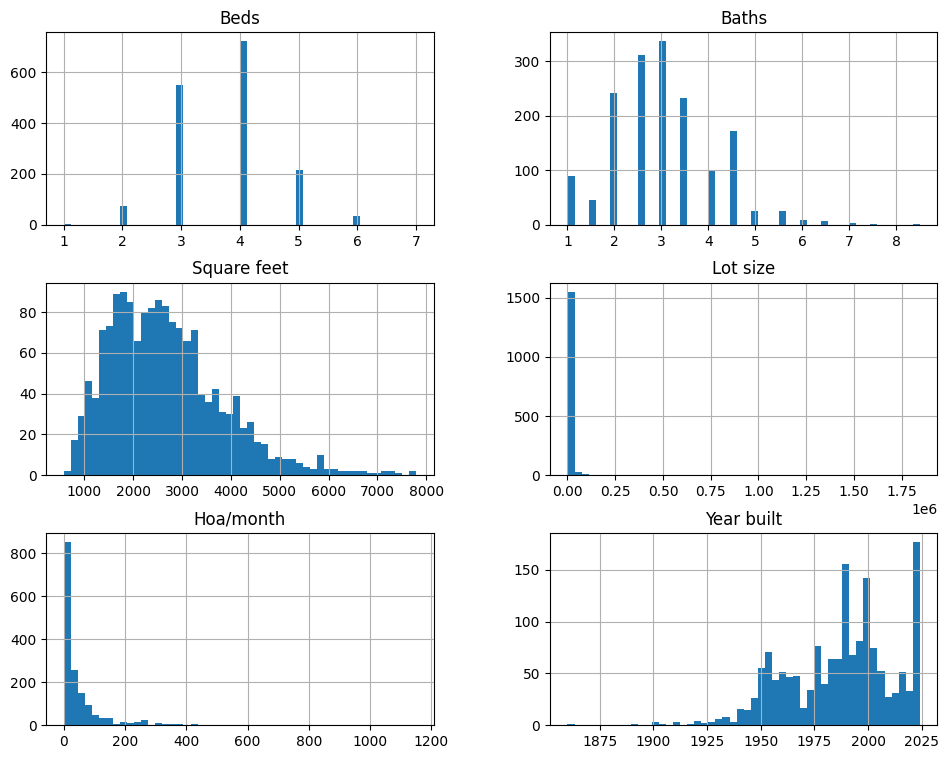

In [460]:
# Viewing the histograms for each numerical variable.
df[num_feat].hist(figsize=(11.5,9), bins=50)
plt.show()

Most numerical variables are positively skewed, particularly 'Lot Size', which may need transformation. It’s unclear why this variable is so skewed, so further investigation might be beneficial.

Additionally, the 'Year Built' variable is an outlier and appears negatively skewed, indicating that most properties are newer, with fewer older homes present.

### Categorical Predictor Variables Analysis

In [461]:
# Creating a for loop that will reveal how many different values occur in each categorical variable.
for i in cat_feat:
    print(f'The \'{i}\' column has',len(df[i].value_counts()),'different categories.')
    print()  

The 'City' column has 15 different categories.

The 'Zip or postal code' column has 30 different categories.

The 'Location' column has 702 different categories.



As observed from above, there are 15 different 'City' options, 30 different 'Zip or postal code' options, and 702 different 'Location' options. Referencing my earlier statements, the three categorical variables will need to be tranformed numerically.
The below photo will be a visual representation of what will be happening (dummy encoding).

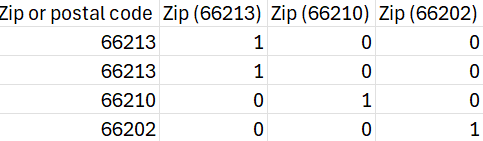

Initially, we have one column on the left, which houses all the 'Zip or postal code' values. For each unique value, a new column is created. If that value occurs in a particular row, a 1 is entered in the corresponding column, while 0s are entered in the remaining columns (dummy encoding).

Considering what we've discussed, we realize that this process will generate over 700 new columns in our DataFrame. With only about 1700 rows, the additional columns probably won’t significantly slow down calculations. However, in real-world scenarios, these extra columns could lead to time constraints. To keep things simple, I won’t utilize the 'Location' variable, as I don’t want to deal with the additional 700 columns required.

In [462]:
# Respecifyign the cat_feat list and deleting the 'Location' variable from our dataframe.
cat_feat = ['City','Zip or postal code']
del df['Location']

''' Creating new dataframe using the get_dummies function from pandas.
    columns parameter are the column names to be changed, from 'City' to 'City_Olathe', same for 'Zip or postal code'.
    drop_first parameter drops the first column in order to help minimize multicollinearity.
'''    
cat_one_hot_encod = pd.get_dummies(df[cat_feat], columns=cat_feat, drop_first=True)

# Initally recieved dataframe with True and False values instead of numbers, so the below will transform True and False into 1's and 0's.
cat_one_hot_encod = cat_one_hot_encod.astype(int)

# Concating our original dataframe with the new dataframe with all the dummy variables.
df = pd.concat([df,cat_one_hot_encod], axis=1)

# Deleting the 'City' and 'Zip or postal code' variables as we now have dummy variables for each.
del df['City']
del df['Zip or postal code']

# Viewing first 5 rows of new dataframe.
df.head()

,Price,Beds,Baths,Square feet,Lot size,Year built,Hoa/month,City_Gardner,City_Leawood,City_Lenexa,...,Zip or postal code_66215.0,Zip or postal code_66216.0,Zip or postal code_66218.0,Zip or postal code_66219.0,Zip or postal code_66220.0,Zip or postal code_66221.0,Zip or postal code_66223.0,Zip or postal code_66224.0,Zip or postal code_66225.0,Zip or postal code_66226.0
1,695000.0,4.0,2.5,3356.0,16223.0,1963.0,7.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,469900.0,3.0,3.0,2540.0,8777.0,2004.0,46.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,600000.0,4.0,3.0,3185.0,3733.0,2008.0,0.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
5,4275417.0,5.0,6.5,6680.0,13877.0,2024.0,816.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,400000.0,3.0,2.5,1188.0,8399.0,1948.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Correlation Analysis

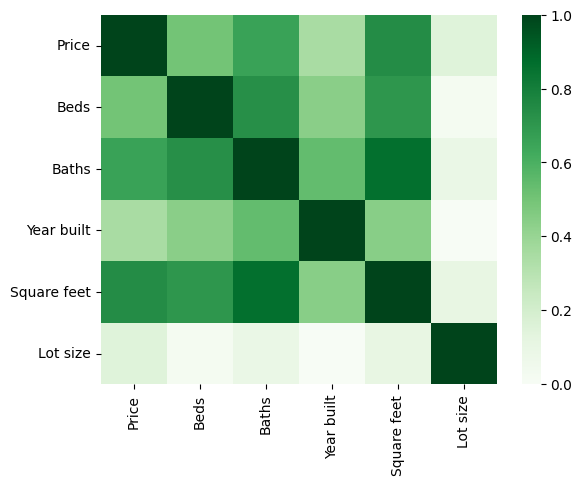

In [463]:
# Creating a correlation matrix between target and og numerical variables.
corr_m = df[['Price','Beds','Baths','Year built','Square feet','Lot size']].corr()
sns.heatmap(corr_m, cmap='Greens')
plt.show()

While we could include the categorical variables when calculating the correlations, it would be simpler to include only the numerical variables. In the plot above, the darker the color, the greater the correlation. For our 'Price' variable, from strongest to weakest correlations, the predictor variables are 'Square feet', 'Baths', 'Bedrooms', 'Year Built', and 'Lot size'. A darker color is beneficial for the correlation between a predictor variable and the target variable. However, a darker color between two predictor variables could indicate potential multicollinearity issues.

## Splitting up the Data

In [464]:
# Importing train_test_split function from sklearn.
from sklearn.model_selection import train_test_split

''' Splitting up our data into a training set with 70% of the orginal data with the remaining 30% becoming a testing set.
    Random state was specified so the same training and testing sets would be produced each time the code cell was run as long 
    as the data remains the same.
'''
train_df, test_df = train_test_split(df, test_size=0.30, random_state=42) 
train_df.to_csv('train_df.csv')
test_df.to_csv('test_df.csv')

## Conclusion:

Now that our data has been split up, we can begin to predict the selling price for Single Family Residental properties in the next notebook.